# ADM-HW5

In this last homework our job is to create a network of all pages in order to do the questions proposed by the professors. So, we starting to import few libraries useful to execute this jupyter notebook, a huge importance is considering the file functions that contains all functions made for this homework.

In [3]:
import pandas as pd
import matplotlib.pyplot as plt
import networkx as nx
from tkinter import _flatten

import functions as fun

# Load the datasets

In this section we import the datasets in order to do the questions reported below this part. 

So, we load the file  "wikigraph_reduced.csv" where we create the main network with all links between pages. This file contains the pages whose belong to the categories that contain a number of articles between 5000 and 30000. 

After, we uploaded also the "wiki-topcats-page-names.txt" in order to save the name of all pages and "wiki-topcats-categories.txt" where we should control if the main rule (the range of all pages in each category) is respected. 

Despite, the professors said that the categories contained the right number of pages for each category, we try to prove this step and we saw that the dataset didn't contain the right number of pages per category, so we fixed the categories removing that cateogories without the right pages range.

In [4]:
edges = fun.read_edges()
edges.head()

,source,dest
0,95,1185516
1,108,1059989
2,108,1062426
3,108,1161925
4,134,541222


After the first load, we read the "wiki-topcats-page-names.txt".

In [5]:
pages_names = fun.read_pages_name()
pages_names

,name
node,
0,Chiasmal syndrome
1,Kleroterion
2,Pinakion
3,LyndonHochschildSerre spectral sequence
4,Zariski's main theorem
...,...
1791484,Noadiah Russell (Yale founder)
1791485,Cornus officinalis
1791486,Peter Grummitt


Read each line of the "wiki-topcats-categories.txt" and check the right number of pages, if this number stays outside the range of 5000 and 30000 kick out that category.

In [6]:
categories = fun.read_categories()
categories

,Category,Pages List
0,English_footballers,"[22860, 28411, 28961, 28979, 29264, 29573, 295..."
1,The_Football_League_players,"[14003, 23536, 27109, 27348, 27459, 27989, 280..."
2,Association_football_forwards,"[26876, 26877, 26879, 26887, 26892, 26904, 269..."
3,Association_football_midfielders,"[14003, 15291, 23536, 26880, 26882, 26885, 268..."
4,Association_football_defenders,"[15217, 22860, 26873, 26878, 26881, 26898, 269..."
5,Harvard_University_alumni,"[77, 1013, 1271, 1663, 1779, 1843, 2212, 3193,..."
6,Major_League_Baseball_pitchers,"[79, 24213, 33054, 37167, 53973, 63107, 69823,..."
7,Members_of_the_United_Kingdom_Parliament_for_E...,"[29098, 29493, 29585, 30255, 30389, 30505, 306..."
8,Indian_films,"[1308, 29286, 53565, 70274, 70275, 70797, 1233..."
9,Year_of_death_missing,"[98, 126, 227, 1823, 2170, 2223, 13215, 14003,..."


*You will notice that one article might belong to a single category or multiple ones. In the case of multiple appearance, you break the ties uniformly at random.*

create a vocabulary in order to create the clean categories without replicates.

In [7]:
nodes = fun.create_vocabulary(categories)

Choose uniformly at random a category where the page will be belong, then create the dictionary.  

Remove also the categories that haven't any node in the graph. Then, we will visualize the correct dataset represented the categories which haven't any node common in other categories

In [8]:
new_categories = fun.fix_categories(categories, edges, nodes)
new_categories

C:\Users\14193\anaconda3\lib\site-packages\numpy\core\_asarray.py:83: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  return array(a, dtype, copy=False, order=order)


,category,pages list
0,English_footballers,"[28961, 48718, 72482, 72496, 72528, 72532, 725..."
1,The_Football_League_players,"[33973, 48730, 72545, 72595, 72609, 72629, 728..."
2,Association_football_defenders,"[48583, 72628, 72943, 73175, 74652, 75196, 752..."
3,Association_football_midfielders,"[72488, 73109, 73145, 73195, 75227, 75438, 757..."
4,Association_football_forwards,"[72536, 72546, 72633, 72802, 72945, 73197, 732..."
5,Year_of_death_missing,"[72579, 72591, 72605, 72826, 73047, 73148, 757..."
6,Year_of_birth_missing,"[72580, 76428, 92666, 92872, 93457, 93668, 978..."
7,Place_of_birth_missing_(living_people),"[84470, 526322, 83446, 460811, 1004070, 100634..."
8,Members_of_the_United_Kingdom_Parliament_for_E...,"[670907, 536438, 536701, 539538, 539779, 54002..."
9,Harvard_University_alumni,"[1663, 1843, 3260, 3431, 11386, 11858, 12295, ..."


# RQ1

Build the graph G=(V, E), where V is the set of articles and E the hyperlinks among them. Now, according to the professors requests we created the graph, but first we consider if the edges dataframe contents a graph directed or not.. in order to understand if the graph is directed or not.

In [7]:
G = fun.check_creation_graph(edges)

After the execution of the function, create the graph adding the nodes and edges presents in the edges dataset loaded before this question.

In [8]:
G = fun.create_graph(edges, pages_names, G)

These are the main info about this new graph created before.

Now, we are focussing to show the proper features of the graph, in terms of how many articles are present, how many edges are present and so on.

In [9]:
nx.info(G)

'Name: \nType: DiGraph\nNumber of nodes: 98343\nNumber of edges: 483094\nAverage in degree:   4.9123\nAverage out degree:   4.9123'

We have exactly 98343 nodes present in this graph and 483094 edges between them, how can we see below this cell.

In [10]:
print(f"The number of nodes is: {G.number_of_nodes()} and the number of edges is: {G.number_of_edges()}")

The number of nodes is: 98343 and the number of edges is: 483094


We know that our graph is **directed** to understand if *the graph is sparse or not*, we should use this formula:

$D = \frac{|E|}{|V|(|V|-1)}$

a dense graph is a graph in which the number of edges is close to the maximal number of edges.

In [11]:
# we can use also nx.density(G)
D = (G.number_of_edges())/(G.number_of_nodes()*(G.number_of_nodes()-1))
print(f"The graph density is: {D}, so the graph is sparse")

The graph density is: 4.9951571365597335e-05, so the graph is sparse


the average of link per article is.. (considering the **degree** of each node)

In [12]:
degrees = dict(G.degree())
sum(degrees.values())/float(len(G))

9.824674862471147

the result presents above include in_degree and out_degree of a graph. We can consider also the in_degree and out_degree formula. But, you could use also the native function of networkx

In [13]:
indegree = sum(dict(G.in_degree()).values())/float(len(G))
outdegree = sum(dict(G.out_degree()).values())/float(len(G))
print(f"the indegree = {indegree} and the outdegree = {outdegree}")

the indegree = 4.912337431235573 and the outdegree = 4.912337431235573


How can we saw briefly above this cell, with these few formulas we can know the degree distribution (added also the out-degree and in-degree for a good way to see the values obtained from our graph) and if this graph is dense or sparse, amazing no?

Now, we are focussing on the visualization of this degree distribution, so..

We are displaying the **nodes degree distribution** considering the in-degree and out-degree.

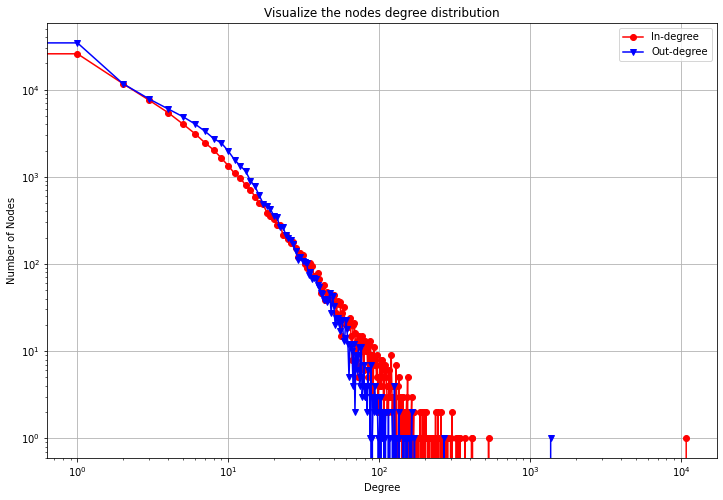

In [14]:
in_degree_freq = fun.degree_histogram_directed(G, in_degree=True)
out_degree_freq = fun.degree_histogram_directed(G, out_degree=True)

fun.plot_degree_distro(in_degree_freq, out_degree_freq)

# RQ2

For this section the first part consisting to insert from input the page that we want to explore in d click choose by a user, then we apply the corresponding algorithm to solve this exercise. 

For this section is useful to execute the **breadth-first search (BFS)**, because we are interested to search all pages that I can achieve at a determinate level (number of click), so this is the most algorithm useful to achieve our goal and that solve the question of our professors.

choose in input a page v, that is considering as the source node in order to start well the algorithm.

In [15]:
v = int(input("Choose a node to start the BFS: "))

Choose a node to start the BFS: 1663


choose the number of clicks d where I can achieve in a good way n pages at level d.

In [16]:
d = int(input("Choose a number of clicks: "))

Choose a number of clicks: 3


Start the algorithm and check if with d click how pages you can arrive starting to the source node considering before this execution. If you can't arrive with d clicks into any pages.. you will receive an advise equal to "Not Possible!".

In [19]:
dist, nodes = fun.BFS(G, v, d)

Check if with d clicks you can arrive to determinate pages destinations and print it, if you can't arrive into any pages print "Not Possible!"

In [20]:
if dist == float("inf"):
    print("Not Possible!")
else:
    indices = [i for i, x in enumerate(dist) if x == d]
    nodes = [pages_names.loc[str(x), "name"] for i, x in enumerate(nodes) if i in indices]
    print(f"the set of all pages that you can achieve with {d} are {nodes}")

the set of all pages that you can achieve with 3 are ['Born Innocent (Redd Kross album)', 'Beyond the Valley of the Dolls', 'Linda Blair']


# RQ3
*returns the minimum number of clicks required to reach all pages in p, starting from the page v, corresponding to the most central article, according to the in-degree centrality, in C.*

Choose randomly the category in order to find the minimum number of clicks to achieve all nodes in one category.

In [14]:
my_dict=fun.get_dict(new_categories)
cat=fun.random_cat(my_dict)
cat

'Association_football_forwards'

Consider the subgraph of G interesting to the selected category chose.

In [15]:
fun.cat_subgraph_inf(my_dict,cat,G)

the number of pages are 2538 and the number of edges are 2804


Considering the node most centered in the graph according to the high degree centrality.

In [16]:
indegree_node=fun.indegree_node(cat,G,my_dict)
source=fun.most_centered(indegree_node)

the node 89851 is the most centered with 41 edges


In order to perform the nearest neighbor, we should have the directed node. In this case we re-calculate the weight of the edges as the min path between each node with its edges connected to other nodes. To execute, this, first we should calculate the bfs for all node.

In [17]:
dict_allbfs=fun.dict_all_bfs(my_dict,cat)
dict_allbfs=fun.calculate_bfs(dict_allbfs,G,cat,my_dict)

100%|██████████| 2538/2538 [00:04<00:00, 598.57it/s]


After that, we create the directed weighted graph with these new values see on functions.py in order to see the basics creation steps for this new graph.

In [18]:
G_cat_W=fun.create_directed_weighted(dict_allbfs,pages_names)

Now, we have our new directed graph and now it is possible to calculate the shortest path through one node (the source node) to all pages given the professors rule.

For this step we prefer using the nearest neighbors in order to find the minimum number of clicks into the graph. 

Here the main steps of the nearest neighbors algorithm:

    1. Check the node v
    2. Find its neighbors
        2.1 If there isn't any neighbors check if the queue is empty or not then continue
        2.2 Insert the neighbors into the list with its distance from v
    3. If the nested list is not empty order the nested list and consider the neighbors with the minimum distance
    4. Insert the neighbor in the queue that have the little distance respect all and repeat.
    
As we can see below the algorithm returns NOT POSSIBLE.. we can't do anymore.

In [22]:
fun.nearest_neigh(G_cat_W, source)

"we can't achieve all pages, so.. NOT POSSIBLE!"

# RQ4

Given in input two categories: C1 and C2, we get the subgraph induced by all the articles in the two categories.

First we choose our two categories:

In [19]:
c1,c2=fun.choose_two_categories(new_categories,G)

Choose the first category:  Association_football_forwards
Choose the second category:  English_footballers


We create the subgraph based on the main graph and the two categories that we have already chosen.

In [20]:
subg=fun.combine_subg(G,c1,c2,new_categories)
nx.info(subg)

'Name: \nType: DiGraph\nNumber of nodes: 6206\nNumber of edges: 10494\nAverage in degree:   1.6909\nAverage out degree:   1.6909'

Let v and u two arbitrary pages in the subgraph. What is the minimum set of hyperlinks one can remove to disconnect u and v?

Here we choose two random nodes in our subgraph and implement our min cut function to see how many edges we have to disconnect.

In [21]:
fun.random_nodes_implement(subg)

0

This result is what we expected because the graph initially is considered as sparse, so the probability to obtain the result as zero is high. Many nodes are disconnected.

# RQ5

Write a function that, given an arbitrary category C0 as input, returns the list of remaning categories sorted by their distance from C0. In particular, the distance between two categories is defined as

distance(C0, Ci) = median(ShortestPath(C0, Ci))

where ShortestPath(C0, Ci) is the set of shortest paths from each pair of nodes in the two categories.

Start choosing a determinate category in order to execute the algorithm.

In [49]:
c0 = str(input("Insert the first category: "))
c0

Insert the first category:  Debut_albums


'Debut_albums'

Define a dict where each key is the category of the dataset and contains the pages list.

In [ ]:
my_dict = fun.get_dict(new_categories)

Calculate first the distances of the pages present into the list of category c0 (consider previously) then, calculate all distances between c0 and the other categories, after each update into the main dict of all bfs. Insert the median value of c0 and the i-th category.

In [50]:
medians = fun.calculate_medians(my_dict, c0, G, list(new_categories["category"]))

100%|██████████| 2553/2553 [12:39<00:00,  3.36it/s]
21it [04:06, 11.76s/it]


After the previous step in order to visualize a good result, consider the median values and show it into the dataframe with the sorted values.

In [65]:
distance_cat0 = fun.medians_dataframe(medians, new_categories)

,category,distance
0,American_film_actors,6
1,American_television_actors,6
2,English-language_films,6
3,American_films,6
4,Black-and-white_films,7
5,Members_of_the_United_Kingdom_Parliament_for_E...,9
6,Rivers_of_Romania,11


# RQ6

Write a function that sorts the categories in the graph according to their PageRank (PR). For this task you need to model the network of categories such that you can apply the PR algorithm.

Change the datatype of new_categories['pages list'] from string to number.

In [10]:
l = len(new_categories)
for i in range(l):
    new_categories['pages list'][i] =  [ int(x) for x in new_categories['pages list'][i]]
new_categories

,category,pages list
0,English_footballers,"[28961, 48718, 72482, 72496, 72528, 72532, 725..."
1,The_Football_League_players,"[33973, 48730, 72545, 72595, 72609, 72629, 728..."
2,Association_football_defenders,"[48583, 72628, 72943, 73175, 74652, 75196, 752..."
3,Association_football_midfielders,"[72488, 73109, 73145, 73195, 75227, 75438, 757..."
4,Association_football_forwards,"[72536, 72546, 72633, 72802, 72945, 73197, 732..."
5,Year_of_death_missing,"[72579, 72591, 72605, 72826, 73047, 73148, 757..."
6,Year_of_birth_missing,"[72580, 76428, 92666, 92872, 93457, 93668, 978..."
7,Place_of_birth_missing_(living_people),"[84470, 526322, 83446, 460811, 1004070, 100634..."
8,Members_of_the_United_Kingdom_Parliament_for_E...,"[670907, 536438, 536701, 539538, 539779, 54002..."
9,Harvard_University_alumni,"[1663, 1843, 3260, 3431, 11386, 11858, 12295, ..."


Interpreting the nodes in old network to its category's name, then construct a category network.

In [11]:
ls = len(edges)
for i in range(0,ls):
    for j in range(0,l):
        if edges['source'][i] in new_categories['pages list'][j]:
            edges['source'][i] = new_categories['category'][j]
for i in range(0,ls):
    for j in range(0,l):
        if edges['dest'][i] in new_categories['pages list'][j]:
            edges['dest'][i] = new_categories['category'][j]

<ipython-input-11-a8c16ffc72cc>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  edges['source'][i] = new_categories['category'][j]
<ipython-input-11-a8c16ffc72cc>:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  edges['dest'][i] = new_categories['category'][j]
C:\Users\14193\anaconda3\lib\site-packages\pandas\core\indexing.py:670: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  iloc._setitem_with_indexer(indexer, value)


Remove the duplicate rows.

In [12]:
newedge=edges.drop_duplicates()
newedge

,source,dest
0,Debut_albums,Place_of_birth_missing_(living_people)
1,Debut_albums,English-language_films
2,Debut_albums,American_television_actors
4,Black-and-white_films,Members_of_the_United_Kingdom_Parliament_for_E...
5,Black-and-white_films,American_film_actors
...,...,...
446428,Black-and-white_films,Rivers_of_Romania
446573,Asteroids_named_for_people,American_films
448639,Association_football_forwards,Black-and-white_films
470894,Main_Belt_asteroids,Association_football_midfielders


Bulid the new category network.

In [13]:
sources= list(newedge['source'])
dests = list(newedge['dest'])
newG = nx.Graph()
for i in range(len(newedge)):
    newG.add_node(sources[i]) # source
    newG.add_node(dests[i]) # dest
    
    newG.add_edge(sources[i], dests[i], weight=1)

Draw the category network.

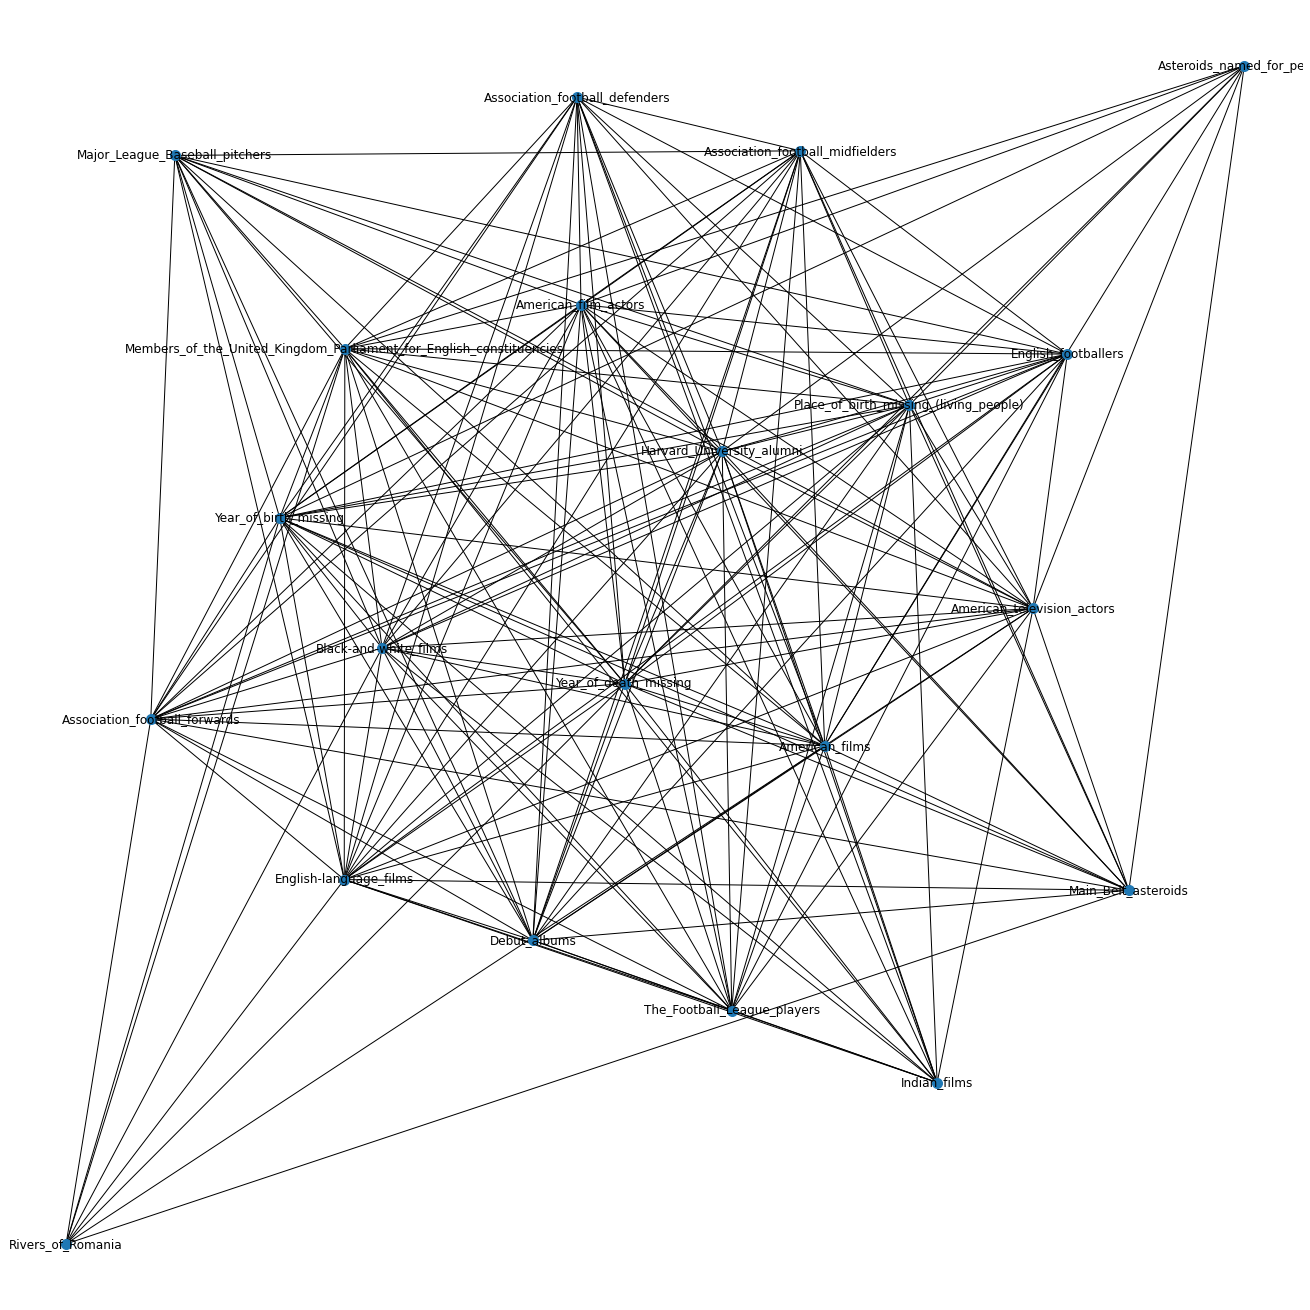

In [14]:
fig = plt.figure(figsize=(18,18))
nx.draw(newG, with_labels=True,node_size=100)
plt.show()

In [15]:
mt = nx.to_numpy_matrix(newG)
a = mt.A 

Calculate the pagerank value for each category.

In [16]:
PG = fun.pageRank(0.85, fun.graphMove(a), fun.firstPr( fun.graphMove(a)))
PG

array([[0.05121294],
       [0.05390836],
       [0.05390836],
       [0.05390836],
       [0.05121294],
       [0.05390836],
       [0.05390836],
       [0.05660377],
       [0.05390836],
       [0.0458221 ],
       [0.03773585],
       [0.02695418],
       [0.03773585],
       [0.05660377],
       [0.04851752],
       [0.05121294],
       [0.05660377],
       [0.0458221 ],
       [0.0458221 ],
       [0.04043127],
       [0.02425876]])

Construct a dataframe for each category and its pagerank value, all is considered sorted by pagerank value of each category.

In [17]:
nodes = list(newG.nodes)
Catlist = list(_flatten(PG.tolist()))
sortCat ={"category":nodes,"pagerank":Catlist}

In [18]:
df = pd.DataFrame(sortCat)
df

,category,pagerank
0,Debut_albums,0.051213
1,Place_of_birth_missing_(living_people),0.053908
2,English-language_films,0.053908
3,American_television_actors,0.053908
4,Black-and-white_films,0.051213
5,Members_of_the_United_Kingdom_Parliament_for_E...,0.053908
6,American_film_actors,0.053908
7,American_films,0.056604
8,Harvard_University_alumni,0.053908
9,Association_football_defenders,0.045822


Sort the dataframe by the pagerank value.

In [19]:
df.sort_values(by=['pagerank'],ascending=0)

,category,pagerank
16,Year_of_birth_missing,0.056604
13,Year_of_death_missing,0.056604
7,American_films,0.056604
6,American_film_actors,0.053908
1,Place_of_birth_missing_(living_people),0.053908
8,Harvard_University_alumni,0.053908
5,Members_of_the_United_Kingdom_Parliament_for_E...,0.053908
3,American_television_actors,0.053908
2,English-language_films,0.053908
4,Black-and-white_films,0.051213


Draw the category-pagerank figure.

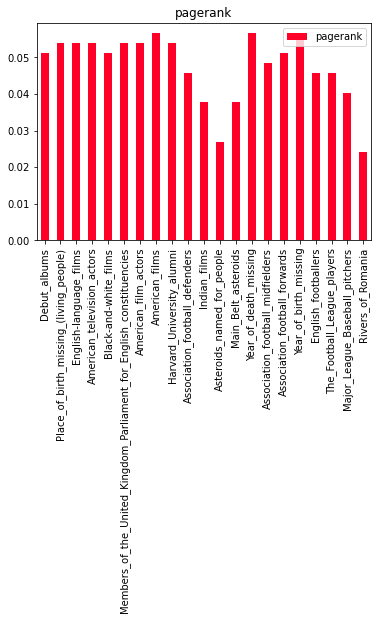

In [20]:
df.plot(kind='bar',colormap='gist_rainbow',title="pagerank")
plt.xticks(range(len(nodes)),nodes)
plt.show()